![picture](https://drive.google.com/uc?export=view&id=1eCsjNAtjXuXfqBLxeEnsBpOikUO06msr)

<br>

---
---

<div class="alert alert-block alert-warning">
<h1><span style="color:green"> Foundations of Artificial Intelligence<br> (AI701-Fall2022) </span><h1>

<h2><span style="color:green"> Lab-05 </span><h2>
</div>

---
---

## 1. Decision Tree Algorithm
**Decision Tree (DT)** algorithm belongs to the family of supervised machine learning algorithms which can be used for both regression and classification tasks. This algorithm takes in data $(X\in\mathbb{R}^{n\times d},$ where $n$ is the number of samples and $d$ is the number of features in each sample) and constructs a tree-structured classifier or regression model.

Following are the main steps to construct a DT:  
**Step-1:** Begin the tree with the root node where entire dataset is considered.  
**Step-2:** Find the best attribute/feature in the dataset using Attribute Selection Measure (ASM) and declare this attribute as root node label.  
**Step-3:** Divide the dataset into subsets using conditions on the values of root node data. Each subset of data will become a child node.  
**Step-4:** At each child node, use ASM and further divide the dataset.  
**Step-5:** Recursively make new child nodes using the subsets of the dataset and  continue this process until a stage is reached where one cannot create the child node and call the final nodes as leaf nodes.





## 1.1 Dataset
We will use a toy dataset 'WEKA Weather Data' published by Fordham University for decision tree algorithm related tasks. 

In [ ]:
import  pandas as pd               # to handle tabular-structured heterogeneous data, data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np                 # linear algebra and numerical computing
import matplotlib.pyplot as plt    # for data visualization 
import seaborn as sns              # for data visualization
import os                          # for paths and operating system related commands

In [ ]:
# prepare pandas dataframe 

header =   "outlook,temperature,humidity,windy,play"
data = \
'''sunny,hot,high,FALSE,no
sunny,hot,high,TRUE,no
overcast,hot,high,FALSE,yes
rainy,mild,high,FALSE,yes
rainy,cool,normal,FALSE,yes
rainy,cool,normal,TRUE,no
overcast,cool,normal,TRUE,yes
sunny,mild,high,FALSE,no
sunny,cool,normal,FALSE,yes
rainy,mild,normal,FALSE,yes
sunny,mild,normal,TRUE,yes
overcast,mild,high,TRUE,yes
overcast,hot,normal,FALSE,yes
rainy,mild,high,TRUE,no'''


df = pd.DataFrame([sub.split(",") for sub in data.split('\n')])
df.columns = header.split(',')

print('WEKA Weather Data published by Fordham University:\n\n')
df

WEKA Weather Data published by Fordham University:




,outlook,temperature,humidity,windy,play
0,sunny,hot,high,FALSE,no
1,sunny,hot,high,TRUE,no
2,overcast,hot,high,FALSE,yes
3,rainy,mild,high,FALSE,yes
4,rainy,cool,normal,FALSE,yes
5,rainy,cool,normal,TRUE,no
6,overcast,cool,normal,TRUE,yes
7,sunny,mild,high,FALSE,no
8,sunny,cool,normal,FALSE,yes
9,rainy,mild,normal,FALSE,yes


In [ ]:
# # we can replace labels with 0 and 1.
# df['play'] = df['play'].replace(['no','yes'],[0,1])  # it replaces ('no' with 0) & ('yes' with 1) in 'play' column of dataframe
# df

In [ ]:
print('Number of Samples             = ', df.shape[0])
print('Number of Attributes/Features = ', df.shape[1]-1) # last column contains class labels

Number of Samples             =  14
Number of Attributes/Features =  4


In [ ]:
print('Attributes/Features Names : ' , list(df.columns), '\n\n')
print('Unique Values of Attributes:\n')
attrib_name_vals_dict = {}
for col_name in df.columns:
    attrib_name_vals_dict[col_name] = list(df[col_name].unique())
    print(f"'{col_name}' = {df[col_name].unique()} ")

Attributes/Features Names :  ['outlook', 'temperature', 'humidity', 'windy', 'play'] 


Unique Values of Attributes:

'outlook' = ['sunny' 'overcast' 'rainy'] 
'temperature' = ['hot' 'mild' 'cool'] 
'humidity' = ['high' 'normal'] 
'windy' = ['FALSE' 'TRUE'] 
'play' = ['no' 'yes'] 


In [ ]:
print(f"Number of Class = {len(df['play'].unique())}")

Number of Class = 2


### 1.1(a) : Get Conditional Data from DataFrame

In [ ]:
def get_conditional_data(df, condition_list):
    # input: dataframe and list of tuples. each tuple should be of the form: (attrib_name, attrib_value)
    # output: returns conditional data samples from the dataframe
    
    bools = np.array([True]*df.shape[0])

    for i in range(len(condition_list)):
        attrib_name , attrib_value = condition_list[i]
        bools = bools & np.array((df[attrib_name]==attrib_value))
    
    return df[bools]

In [ ]:
# it will return data samples in which 'outlook' attribute is equal to 'sunny' and 'windy' attribute is equal to 'FALSE'
cond_list = [ ('outlook','sunny') , ('windy','FALSE') ]
print('Conditional Data')
print('Condition: ', "".join([ f"{tupl[0]}={tupl[1]} & " for tupl in cond_list])[:-2], "\n" )

get_conditional_data(df, cond_list )

Conditional Data
Condition:  outlook=sunny & windy=FALSE  



,outlook,temperature,humidity,windy,play
0,sunny,hot,high,FALSE,no
7,sunny,mild,high,FALSE,no
8,sunny,cool,normal,FALSE,yes


### 1.1(b) : Get Categorical Distribution of Class Attribute from DataFrame

In [ ]:
def get_class_distribution(df, class_attrib_name):
    # input: dataframe, name of the class attribute in dataframe
    # output: returns the categorical distribution of class attribute in the given dataframe

    counts = df[class_attrib_name].value_counts().to_numpy()
    probs  = counts/sum(counts)
    class_labels = list(df[class_attrib_name].value_counts().index)

    return class_labels , probs

In [ ]:
class_labels , class_probs = get_class_distribution(df, 'play')
print('Class Labels = ', class_labels)
print('Class Probs  = ', class_probs)

Class Labels =  ['yes', 'no']
Class Probs  =  [0.64285714 0.35714286]


In [ ]:
def plot_categorical_dis(class_labels,class_probs):

    fig = plt.figure(figsize = (6, 3))
 
    # creating the bar plot
    ax = sns.barplot(data=df, x=class_labels, y=np.array(class_probs)*100)
    

    plt.xlabel("Class Labels", fontsize=15)
    plt.ylabel("Probabilities (%)", fontsize=15)
    plt.title("Categorical Distribution of Class: 'Play' ", fontsize=15)
    plt.show()

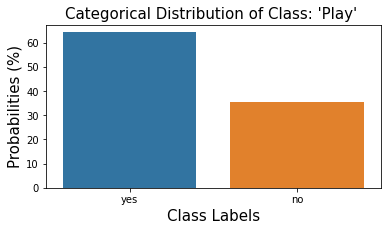

In [ ]:
plot_categorical_dis(class_labels,class_probs)

In [ ]:
# this function can be used to find categorical distribution of unique values of any attribute

def get_attrib_distribution(df, attrib_name):
    # input: dataframe, name of the attribute in dataframe
    # output: returns the categorical distribution of the unique values of attribute in the given dataframe

    counts = df[attrib_name].value_counts().to_numpy()
    probs  = counts/sum(counts)
    attrib_unique_values = list(df[attrib_name].value_counts().index)
    return attrib_unique_values , probs

## 1.2 Attribute Selection Measure
At each decision node, algorithm uses an Attribute Selection Measure (ASM) to pick the best attribute from dataset. ASM is a heuristic for selecting the splitting criterion that partitions data into the best possible manner. It is also known as splitting rule because it helps us to decide which feature/attribute to split on at each step in building the tree. ASM assigns a rank to each feature(or attribute). Best score/rank attribute will be selected as a splitting attribute. Most popular selection measures are Information Gain, Information Gain Ratio, and Gini Index. Before moving to brief introduction of ASMs, we define a few terminologies/notations.

Assume that $\mathcal{X}=\{(\mathbf{x}^{(i)}, y^{(i)})\}_{i=1}^{n}$ represents the dataset containing $n$ samples and each sample contains $d$ attributes and a class label. Values of $d$ attributes in $i_{\text{th}}$ sample are represented by $\mathbf{x}^{(i)}=(x_1^{(i)},x_2^{(i)},\ldots,x_d^{(i)})^\top$. The notation $vals(x_j)$ represents the possible values of $x_j$  ($j_{\text{th}}$ attribute) e.g. if  $x_j=\text{'Temperature'}$, then $vals(x_j)=\{\mathrm{Hot}, \mathrm{Mild}, \mathrm{Cool}\}$.  Moreover, assume that there are $K$ classes in the dataset and let $\mathrm{\mathbf{p}}=(p_1,p_2,\ldots,p_K)^\top$ represent the vector containing percentage (or probability) of each class present in the dataset.
<br><br><br>
### 1.2(a) : Entropy
Entropy of categorical distribution $\mathbf{p}$, denoted as $\mathrm{H}(\mathbf{p})$, is defined as follows:
$$\mathrm{H}(\mathbf{p})=-\sum_{k=1}^{K} p_{k}\log_{2}(p_{k})$$

In [ ]:
def get_entropy(p):
    # input: categorical distribution (an array or list, elements must sum to one)
    # output: entropy of given categorical distribution
    summ = 0
    for p_k in p:
        summ = summ + p_k*np.log2(p_k)
    entropy = -summ
    return entropy

In [ ]:
dummy_p = np.array([1,2,3])/6
print('Entropy of Categorical Distribution\nH(p) =' , round(get_entropy(dummy_p),5))

Entropy of Categorical Distribution
H(p) = 1.45915


### 1.2(b) : Information Gain $\mathrm{(IG)}$

Information Gain associated with $x_j$ attribute (after splitting the source dataset into multiple child subsets), denoted as $\operatorname{IG}(\mathbf{p},x_j)$, is calculated as follows: 
$$
{\displaystyle \underbrace{\operatorname{IG}(\mathbf{p},x_j)} _{\text{information gain}}=\underbrace {\mathrm {H}(\mathbf{p})}_{\text{entropy (parent)}}-\underbrace {\mathrm {H} (\mathbf{p}\mid x_j)}_{\text{weighted sum of entropies (children)}}}$$

where $\mathrm {H}(\mathbf{p}\mid x_j)$ is the weighted sum of entropies of class labels present in child node data subsets. Definition of $\mathrm {H}(\mathbf{p}\mid x_j)$ is given below:  

$$
\mathrm {H}(\mathbf{p}\mid x_j)=\sum _{v\in vals(x_j)} \Pr(x_j=v)\times\mathrm{H}(\mathbf{p}\mid x_j=v),$$
where $\Pr(x_j=v)$ is the percentage of samples in source data in which value of $j_{\text{th}}$ feature is equal to $v$. In order to calculate $\mathrm{H}(\mathbf{p}\mid x_j=v)$, we first split the source data at decision node and then select the subset in which value of $x_j$ attribute is equal to $v$. In this subset of data, we find the probability of each class label, i.e. $\Pr(k\mid x_j)$, and then compute conditional entropy as follows:
$$\mathrm{H}(\mathbf{p}\mid x_j=v) = -\sum_{k=1}^{K} \Pr(k\mid x_j=v)\times\log_{2}\left(\Pr(k\mid x_j=v)\right).$$
Information gain computes the difference between entropy of class labels before split and average entropy of class labels after splitting the source dataset based on given attribute values.
In layman terms, it calculates how much information a feature provides us about a class. Therefore, a node/attribute having the highest information gain is picked for decision node. This process is repeated for every decision node.

In [ ]:
def get_info_gain(df, attrib_name=None, class_attrib_name=None):

    # unconditional class probability and entropy
    class_labels , class_probs = get_class_distribution(df, class_attrib_name) # p = (p_1,p_2,...,p_k)
    H_p = get_entropy(class_probs) # H(p)


    # probabilites of the unique values of the given attribute in dataframe
    attrib_unique_values , attrib_probs = get_attrib_distribution(df, attrib_name) # Pr(x_j=v)  for all v in vals(x_j)

    H_p_xj = 0 # H(p | x_j)
    for v_i , v in enumerate(attrib_unique_values):  # indices and unique values of x_j attribute
        df_xj_v = get_conditional_data(df, [(attrib_name,v)]) # it returns the samples of the given dataframe in which x_j=v
        class_labels_xj_v , class_probs_xj_v = get_class_distribution(df_xj_v, class_attrib_name) # conditional probability of classes: Pr(k | x_j=v) and k in {1,2,...,K}
        
        H_p_xj_v = get_entropy(class_probs_xj_v) # H(p | x_j=v)
        H_p_xj = H_p_xj + attrib_probs[v_i]*H_p_xj_v # Pr(k | x_j=v) * H(p | x_j=v)

    info_gain = H_p - H_p_xj # H(p) - H(p | x_j)

    return info_gain

In [ ]:
info_gain_outlook = get_info_gain(df, attrib_name='outlook', class_attrib_name='play')
print("Information Gain of 'outlook' =" , info_gain_outlook)

Information Gain of 'outlook' = 0.2467498197744391


<br><br>
**TO DO :** Find `Information Gain` of `temperature` , `humidity` and `windy` attributes and comapre your values with the ones shown in the tables of [this](https://en.wikipedia.org/wiki/Information_gain_ratio#Example) example. 
<br><br>
**Question:** According to `Information Gain` values of each attribute, which attribute should be selected for root node?  
**Answer:**

<br><br>


In [ ]:
info_gain_temperature = get_info_gain(df, attrib_name=??, class_attrib_name=??)
info_gain_humidity    = get_info_gain(df, attrib_name=??, class_attrib_name=??)
info_gain_windy       = get_info_gain(df, attrib_name=??, class_attrib_name=??)

print("Information Gain of 'outlook'     =" , round(info_gain_outlook,5))
print("Information Gain of 'temperature' =" , round(info_gain_temperature,5))
print("Information Gain of 'humidity'    =" , round(info_gain_humidity,5))
print("Information Gain of 'windy'       =" , round(info_gain_windy,5))

### 1.2(c) : Information Gain Ratio $\mathrm{(IGR)}$
Information Gain is biased towards choosing an attribute having a large number of distinct values. Information Gain Ratio (IGR) is a modification of Information Gain that reduces its bias and is usually the best option. It was introduced by [Ross Quinlan](https://link.springer.com/article/10.1007/BF00116251) in 1986.  IGR overcomes the problem with information gain by taking into account the number of branches that would result before making the split. It corrects information gain by taking the intrinsic information of a split into account. Formal definition of Information Gain Ratio of an attribute $x_j$, denotes as $\operatorname{IGR}(\mathbf{p},x_j)$, is given below:

$$\operatorname{IGR}(\mathbf{p},x_j) = \frac{\operatorname{IG}(\mathbf{p},x_j)}{\mathrm{SplitInfo}(x_j)},$$

where $\mathrm{SplitInfo}(x_j) = -\sum_{v\in vals(x_j)} \times\Pr(x_j=v) \log_2(\Pr(x_j=v))$. In other words, `SplitInfo`$(x_j)$ is actually the entropy of the categorical distribution of the values of $x_j$ attribute. An attribute which has more number of distinct values, will have large SplitInfo and it will reduce IGR of that attribute. Similar to IG, an attribute with higher value of IGR is selected for a particular decision node.

In [ ]:
def get_split_info(df, attrib_name=None):
    attrib_unique_values , probs = get_attrib_distribution(df, attrib_name)
    split_info = get_entropy(probs)
    return split_info

In [ ]:
split_info_outlook = get_split_info(df, attrib_name='outlook')
print("SplitInfo of 'outlook' =" , split_info_outlook)

SplitInfo of 'outlook' = 1.5774062828523454


<br><br>
**TO DO :** Find `SplitInfo` of `temperature` , `humidity` and `windy` attributes and comapre your values with the ones shown in the tables of [this](https://en.wikipedia.org/wiki/Information_gain_ratio#Example) example. 
<br><br>

In [ ]:
split_info_outlook     = get_split_info(df, attrib_name=??)
split_info_temperature = get_split_info(df, attrib_name=??)
split_info_humidity    = get_split_info(df, attrib_name=??)
split_info_windy       = get_split_info(df, attrib_name=??)

print("SplitInfo of 'outlook'     =" , round(split_info_outlook,5))
print("SplitInfo of 'temperature' =" , round(split_info_temperature,5))
print("SplitInfo of 'humidity'    =" , round(split_info_humidity,5))
print("SplitInfo of 'windy'       =" , round(split_info_windy,5))

In [ ]:
def get_info_gain_ratio(df, attrib_name=None, class_attrib_name=None):
    info_gain = get_info_gain(df, attrib_name=attrib_name, class_attrib_name=class_attrib_name) # IG(p,x_j)  ,  get information gain of the given attribute
    split_info = get_split_info(df, attrib_name=attrib_name) # SplitInfo(x_j)  ,  get split information of the given attribute
    info_gain_ratio = info_gain/split_info # IGR(p,x_j) = IG(p,x_j)/SplitInfo(x_j)
    return info_gain_ratio


In [ ]:
info_gain_ratio_outlook = get_info_gain_ratio(df, attrib_name='outlook', class_attrib_name='play')
print("Infomration Gain Ratio of 'outlook' =" , info_gain_ratio_outlook)

Infomration Gain Ratio of 'outlook' = 0.15642756242117514


<br><br>
**TO DO :** Find `Information Gain Ratio` of `temperature` , `humidity` and `windy` attributes and comapre your values with the ones shown in the tables of [this](https://en.wikipedia.org/wiki/Information_gain_ratio#Example) example. 
<br><br>
**Question:** According to `Information Gain Ratio` values of each attribute, which attribute should be selected for root node?  
**Answer:**

<br><br>

In [ ]:
info_gain_ratio_outlook     = get_info_gain_ratio(df, attrib_name=??, class_attrib_name=??)
info_gain_ratio_temperature = get_info_gain_ratio(df, attrib_name=??, class_attrib_name=??)
info_gain_ratio_humidity    = get_info_gain_ratio(df, attrib_name=??, class_attrib_name=??)
info_gain_ratio_windy       = get_info_gain_ratio(df, attrib_name=??, class_attrib_name=??)

print("Information Gain Ratio of 'outlook'     =" , round(info_gain_ratio_outlook,5))
print("Information Gain Ratio of 'temperature' =" , round(info_gain_ratio_temperature,5))
print("Information Gain Ratio of 'humidity'    =" , round(info_gain_ratio_humidity,5))
print("Information Gain Ratio of 'windy'       =" , round(info_gain_ratio_windy,5))

### 1.2(d) : Gini Index $(\mathrm{I_G})$
Gini Index of an attribute is a measure of **how often a randomly chosen element from the splitted dataset would be incorrectly labelled if it was randomly labeled according to the distribution of labels in the splitted dataset**. Assume that a sample of the dataset belonging to class $k$ has probability $p_k$ of being randomly chosen. Gini Index of a categorical distribution $\mathrm{\mathbf{p}}=(p_1,p_2,\ldots,p_K)^\top$, denoted as $\operatorname{I}_{G}(\mathbf{p})$, can be computed by summing the probability $p_{k}$ times the probability $(1-p_{k})$ of a mistake in categorizing that item. 
$$\operatorname{I}_{G}(\mathbf{p})=\sum _{k=1}^{K}p_{k}(1-p_{k})=1-\sum _{k=1}^{K}p_{k}^{2}$$
In layman terms, Gini Index is a measure of impurity used while creating a DT. **An attribute with the low Gini Index should be preferred as compared to the one with high Gini Index for a decision node**. When source dataset is splitted into multiple subsets based on an attribute\textquotesingle s values, there will be a categorical distribution of class labels in each subset. Therefore, Gini Index of the attribute will be weighted sum of Gini Indices of all subsets. Following is the formal definition of Gini Index of $x_j$ attribute:
$$\operatorname{I}_{G}(\mathbf{p}, x_j)=\sum_{v \in vals(x_j)} \Pr(x_j=v) \times \operatorname{I}_{G}(\mathbf{p}\mid x_j=v),$$
where $\operatorname{I}_{G}(\mathbf{p}\mid x_j=v) = 1 - \sum_{k=1}^{K} \left(\Pr(k\mid x_j=v)\right)^2$.  
$\operatorname{I}_{G}(\mathbf{p}, x_j)$ is computed for each attribute at decision node and the one with smallest value is selected for the corresponding decision node.

In [ ]:
def get_gini_index(df, attrib_name=None, class_attrib_name=None):

    # probabilites of the unique values of the given attribute in dataframe
    attrib_unique_values , attrib_probs = get_attrib_distribution(df, attrib_name) # Pr(x_j=v)  for all v in vals(x_j)

    IG_p_xj = 0 # I_G(p , x_j)
    for v_i , v in enumerate(attrib_unique_values):  # indices and unique values of x_j attribute
        df_xj_v = get_conditional_data(df, [(attrib_name,v)]) # it returns the samples of the given dataframe in which x_j=v
        class_labels_xj_v , class_probs_xj_v = get_class_distribution(df_xj_v, class_attrib_name) # conditional probability of classes: Pr(k | x_j=v) and k in {1,2,...,K}
        
        IG_p_xj_v = 1-sum(class_probs_xj_v**2) #  I_G(p | x_j=v)
        IG_p_xj = IG_p_xj + attrib_probs[v_i]*IG_p_xj_v # Pr(k | x_j=v) * I_G(p | x_j=v)

    gini_index = IG_p_xj

    return gini_index

In [ ]:
gini_index_outlook = get_gini_index(df, attrib_name='outlook', class_attrib_name='play')
print("Gini Index of 'outlook' =" , gini_index_outlook)

Gini Index of 'outlook' = 0.34285714285714286


<br><br>
**TO DO :** Find `Gini Index` of `temperature` , `humidity` and `windy` attributes and comapre your values with the ones shown in the output of following cell. 
<br><br>
**Question:** According to `Gini Index` values of each attribute, which attribute should be selected for root node?  
**Answer:**

<br><br>

In [ ]:
gini_index_outlook     = get_info_gain_ratio(df, attrib_name=??, class_attrib_name=??)
gini_index_temperature = get_info_gain_ratio(df, attrib_name=??, class_attrib_name=??)
gini_index_humidity    = get_info_gain_ratio(df, attrib_name=??, class_attrib_name=??)
gini_index_windy       = get_info_gain_ratio(df, attrib_name=??, class_attrib_name=??)

print("Infomration Gain Ratio of 'outlook'     =" , round(gini_index_outlook,5))
print("Infomration Gain Ratio of 'temperature' =" , round(gini_index_temperature,5))
print("Infomration Gain Ratio of 'humidity'    =" , round(gini_index_humidity,5))
print("Infomration Gain Ratio of 'windy'       =" , round(gini_index_windy,5))


## 1.3 Construct a DecisionTree Classifier using Information Gain Ratio

In [ ]:
def get_asm_vals(df, attrib_names=[],  class_attrib_name=None, asm_type=None):
    # input: dataframe , a list of attribute names , type of ASM e.g. 'gini'
    # output: a list of attribute names and a list of ASM values corresponding to each attribute in given dataframe
    asm_vals = []
    for attrib_name in attrib_names:
        if asm_type=='info_gain':
            asm_vals.append( get_info_gain(df, attrib_name=attrib_name, class_attrib_name=class_attrib_name) )
        elif asm_type=='info_gain_ratio':
            asm_vals.append( get_info_gain_ratio(df, attrib_name=attrib_name, class_attrib_name=class_attrib_name) )
        elif asm_type=='gini':
            asm_vals.append( get_gini_index(df, attrib_name=attrib_name, class_attrib_name=class_attrib_name) )
        else:
            raise ValueError(f'The ASM type {asm_type} is no supported.')        

    return attrib_names, asm_vals



In [ ]:
# first of all, we take entire dataset at root node and find 'IGR' of each attribute

In [ ]:
# complete dataset
df

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,FALSE,no
1,sunny,hot,high,TRUE,no
2,overcast,hot,high,FALSE,yes
3,rainy,mild,high,FALSE,yes
4,rainy,cool,normal,FALSE,yes
5,rainy,cool,normal,TRUE,no
6,overcast,cool,normal,TRUE,yes
7,sunny,mild,high,FALSE,no
8,sunny,cool,normal,FALSE,yes
9,rainy,mild,normal,FALSE,yes


In [ ]:
attrib_names, asm_vals = get_asm_vals(df, attrib_names=['outlook', 'temperature', 'humidity', 'windy'],  class_attrib_name='play', asm_type='info_gain_ratio')

In [ ]:
print('ASM = Information Gain Ratio (IGR)')
for i,attrib_name in enumerate(attrib_names):
    print(f"ASM Value of '{attrib_name}' = {round(asm_vals[i],3)}")


ASM = Information Gain Ratio (IGR)
ASM Value of 'outlook' = 0.156
ASM Value of 'temperature' = 0.019
ASM Value of 'humidity' = 0.152
ASM Value of 'windy' = 0.049


In [ ]:
# 'outlook' attribute has highest 'IGR' value
# sine we have figured out that 'outlook' should be at root node according to 'IGR',
# therefore, we will split data according to the values of 'outlook' attribute.

# we will partition the original dataset according to the values of root attribute.
df_outlook_sunny = get_conditional_data(df, [('outlook','sunny')])
df_outlook_rainy = get_conditional_data(df, [('outlook','rainy')])
df_outlook_overcast = get_conditional_data(df, [('outlook','overcast')])  

In [ ]:
df_outlook_sunny

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,FALSE,no
1,sunny,hot,high,TRUE,no
7,sunny,mild,high,FALSE,no
8,sunny,cool,normal,FALSE,yes
10,sunny,mild,normal,TRUE,yes


In [ ]:
df_outlook_rainy

,outlook,temperature,humidity,windy,play
3,rainy,mild,high,FALSE,yes
4,rainy,cool,normal,FALSE,yes
5,rainy,cool,normal,TRUE,no
9,rainy,mild,normal,FALSE,yes
13,rainy,mild,high,TRUE,no


In [ ]:
df_outlook_overcast

,outlook,temperature,humidity,windy,play
2,overcast,hot,high,FALSE,yes
6,overcast,cool,normal,TRUE,yes
11,overcast,mild,high,TRUE,yes
12,overcast,hot,normal,FALSE,yes


In [ ]:
# now, we need to work on each branch of 'outlook'
# let's take 'sunny' branch and see what should be its child node according to 'IGR' of remaining attributes
 
attrib_names, asm_vals = get_asm_vals(df_outlook_sunny, attrib_names=['temperature', 'humidity', 'windy'],  class_attrib_name='play', asm_type='info_gain_ratio')

In [ ]:
print('ASM = Information Gain Ratio (IGR)')
for i,attrib_name in enumerate(attrib_names):
    print(f"ASM Value of '{attrib_name}' = {round(asm_vals[i],3)}")


ASM = Information Gain Ratio (IGR)
ASM Value of 'temperature' = 0.375
ASM Value of 'humidity' = 1.0
ASM Value of 'windy' = 0.021


In [ ]:
# we can conclude that child of 'sunny' branch should be 'humidity'.
# now, we move to 'rainy' branch of 'outlook' attribute

attrib_names, asm_vals = get_asm_vals(df_outlook_rainy, attrib_names=['temperature', 'humidity', 'windy'],  class_attrib_name='play', asm_type='info_gain_ratio')

In [ ]:
print('ASM = Information Gain Ratio (IGR)')
for i,attrib_name in enumerate(attrib_names):
    print(f"ASM Value of '{attrib_name}' = {round(asm_vals[i],3)}")


ASM = Information Gain Ratio (IGR)
ASM Value of 'temperature' = 0.021
ASM Value of 'humidity' = 0.021
ASM Value of 'windy' = 1.0


In [ ]:
# IGR values show that child of 'rainy' branch should be 'windy'.
# now, we can move to 'overcast' branch of 'outlook' attribute

attrib_names, asm_vals = get_asm_vals(df_outlook_overcast, attrib_names=['temperature', 'humidity', 'windy'],  class_attrib_name='play', asm_type='info_gain_ratio')

In [ ]:
print('ASM = Information Gain Ratio (IGR)')
for i,attrib_name in enumerate(attrib_names):
    print(f"ASM Value of '{attrib_name}' = {round(asm_vals[i],3)}")


ASM = Information Gain Ratio (IGR)
ASM Value of 'temperature' = -0.0
ASM Value of 'humidity' = -0.0
ASM Value of 'windy' = -0.0


In [ ]:
# all IGR values are zero. it means that this branch has a pure child node and we can declare it as 'leaf' node. tree does not grow after 'leaf' node.

<br><br>
**TO DO :** Complete rest of the decision tree and draw it on page.
<br><br>

**Note:** We have discussed different ASMs for a classification tree. For a regression tree, another ASM called `Variance Reduction`, is used. To learn about construction of regression tree with `Variance Reduction` using same dataset, please refere to [this](https://www.saedsayad.com/decision_tree_reg.htm) resource.

<br>

---
---
<br>

# Ensemble learning
https://towardsdatascience.com/basic-ensemble-learning-random-forest-adaboost-gradient-boosting-step-by-step-explained-95d49d1e2725
in general, is a model that makes predictions based on a number of different models

Two most popular ensemble methods are bagging and boosting.

**Bagging**: Training a bunch of individual models in a parallel way. Each model is trained by a random subset of the data. 


**Boosting**: Training a bunch of individual models in a sequential way. Each individual model learns from mistakes made by the previous model.

![picture](https://miro.medium.com/max/1400/1*bUySDOFp1SdzJXWmWJsXRQ.png)


## AdaBoost (Adaptive Boosting)
AdaBoost is a boosting ensemble model and works especially well with the decision tree. Boosting model’s key is learning from the previous mistakes, e.g. misclassification data points.

AdaBoost learns from the mistakes by increasing the weight of misclassified data points.

![picture](https://miro.medium.com/max/1400/1*bMvOaN1uNcaI9dvwH7McKw.png)

**Step 0**: Initialize the weights of data points. if the training set has 100 data points, then each point’s initial weight should be 1/100 = 0.01.

Step 1: Train a decision tree

**Step 2**: Calculate the weighted error rate (e) of the decision tree. The weighted error rate (e) is just how many wrong predictions out of total and you treat the wrong predictions differently based on its data point’s weight. The higher the weight, the more the corresponding error will be weighted during the calculation of the (e).

**Step 3**: Calculate this decision tree’s weight in the ensemble

the weight of this tree = learning rate * log( (1 — e) / e)

  - the higher weighted error rate of a tree, the less decision power the tree will be given during the later voting.  
  - the lower weighted error rate of a tree, the higher decision power the tree will be given during the later voting.  

**Step 4**: Update weights of wrongly classified points

the weight of each data point =

if the model got this data point correct, the weight stays the same
if the model got this data point wrong, the new weight of this point = old weight * np.exp(weight of this tree)
Note: The higher the weight of the tree (more accurate this tree performs), the more boost (importance) the misclassified data point by this tree will get. The weights of the data points are normalized after all the misclassified points are updated.

**Step 5**: Repeat Step 1(until the number of trees we set to train is reached)

**Step 6**: Make the final prediction

The AdaBoost makes a new prediction by adding up the weight (of each tree) multiply the prediction (of each tree). Obviously, the tree with higher weight will have more power of influence the final decision.

![picture](https://miro.medium.com/max/1400/1*MwIT3Gu-dhICzEou7he3OQ.png)

## 2. AdaBoost

As mentioned earlier, `AdaBoost` method falls in the category of boosting ensemble learning. The core principle of AdaBoost is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction.  


The data modifications at each so-called *boosting* iteration consist of applying weights $w_1,w_2,\ldots,w_n$  to each of the training samples. Initially, those weights are all set to $1/n$, so that the first step simply trains a weak learner on the original data. For each successive iteration, the sample weights are individually modified and the learning algorithm is reapplied to the re-weighted dataset. At a given step, those training examples that were incorrectly predicted by the boosted model induced at the previous step have their weights increased, whereas the weights are decreased for those that were predicted correctly. As iterations proceed, examples that are difficult to predict receive ever-increasing influence. Each subsequent weak learner is thereby forced to concentrate on the examples that are missed by the previous ones in the sequence.

In [ ]:
from sklearn import datasets                          # to load datasets provided by sklearn
from sklearn.ensemble import AdaBoostClassifier       # import AdaBoost classifier
from sklearn.model_selection import train_test_split  # import train_test_split function
from sklearn import metrics                           # import scikit-learn metrics module for accuracy calculation

import  pandas as pd                                  # to handle tabular-structured heterogeneous data, data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np                                    # linear algebra and numerical computing
import matplotlib.pyplot as plt                       # for data visualization 
import seaborn as sns                                 # for data visualization
import os                                             # for paths and operating system related commands

### 2.1 Load the Dataset
More information about `BreastCancer` dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)).

In [ ]:
breast_cancer_data = datasets.load_breast_cancer()

In [ ]:
df = pd.DataFrame(data=breast_cancer_data.data, columns=breast_cancer_data.feature_names)

df['target'] = breast_cancer_data.target

df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
X = df.drop('target', axis=1)
y = df['target']

#### Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

#### Feature Scaling
Assuming $\mathrm{x}_i\in\mathbb{R}^N$ is $i_{\text{th}}$ feature column and $N$ is the total number of samples. Stanadard feature scaling of $\mathrm{x}_i$ is done as follows:

$$\hat{\mathrm{x}}_i = (\mathrm{x}_i - \mu_i)/\sigma_i ~~,$$

where $\mu_i$ and $\sigma_i$ are the mean and standard deviation of $i_{\text{th}}$ feature column $\mathrm{x}_i$.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 2.2 Build and Train AdaBoost Model

In [ ]:
# base estimator/model/learner
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier(random_state=0)

# create adaboost classifer object
AdaBoost = AdaBoostClassifier(n_estimators=15 , base_estimator=DecisionTree)

# train Adaboost classifer
model = AdaBoost.fit(X_train, y_train)


### 2.3 Perform Inference on Test Data

In [ ]:
# Classification report is a way to evaluate the classification model performance. 
# It displays the precision, recall, f1 and support scores for the model
from sklearn.metrics import classification_report

#Predict the response for test dataset
y_test_pred = model.predict(X_test)

print('Inference Results of Test Set ...')
print(classification_report(y_test, y_test_pred))

Inference Results of Test Set ...
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        61
           1       0.96      0.90      0.93       110

    accuracy                           0.91       171
   macro avg       0.90      0.92      0.91       171
weighted avg       0.92      0.91      0.91       171



### 2.4 Probe the Fitted AdaBoost Model

In [ ]:
print('No. of Classes : ', model.n_classes_ )
print('Classes : ', model.classes_ )
print('No. of Features : ', model.n_features_in_ )

No. of Classes :  2
Classes :  [0 1]
No. of Features :  30


In [ ]:
print('Base Estimator : ', model.base_estimator_)

Base Estimator :  DecisionTreeClassifier(random_state=0)


In [ ]:
model.estimator_weights_

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
model.estimator_errors_

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

### 2.5 Change the type of *Base Estimator* in AdaBoost

In [ ]:
# Import Support Vector Classifier
from sklearn.svm import SVC

SupportVectorClassifier = SVC(probability=True, kernel='linear')

# create adaboost classifer object
AdaBoost = AdaBoostClassifier(n_estimators=10 , base_estimator=SupportVectorClassifier)

# train Adaboost classifer
model = AdaBoost.fit(X_train, y_train)


# Classification report is a way to evaluate the classification model performance. 
# It displays the precision, recall, f1 and support scores for the model
from sklearn.metrics import classification_report

#Predict the response for test dataset
y_test_pred = model.predict(X_test)

print('Inference Results of Test Set ...')
print(classification_report(y_test, y_test_pred))

Inference Results of Test Set ...
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        61
           1       0.94      1.00      0.97       110

    accuracy                           0.96       171
   macro avg       0.97      0.94      0.95       171
weighted avg       0.96      0.96      0.96       171



### 2.6 Change the number of *Base Estimators* in AdaBoost

In [ ]:
# Import Support Vector Classifier
from sklearn.svm import SVC

SupportVectorClassifier = SVC(probability=True, kernel='linear')

# create adaboost classifer object
AdaBoost = AdaBoostClassifier(n_estimators=5 , base_estimator=SupportVectorClassifier)

# train Adaboost classifer
model = AdaBoost.fit(X_train, y_train)


# Classification report is a way to evaluate the classification model performance. 
# It displays the precision, recall, f1 and support scores for the model
from sklearn.metrics import classification_report

#Predict the response for test dataset
y_test_pred = model.predict(X_test)

print('Inference Results of Test Set ...')
print(classification_report(y_test, y_test_pred))

Inference Results of Test Set ...
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        61
           1       0.96      1.00      0.98       110

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

